c:\Users\prati\Desktop\Hand Gesture Recognition\environment_cnn\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2864 - loss: 1.4071
Epoch 1: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2897 - loss: 1.4054 - val_accuracy: 0.3089 - val_loss: 1.3753
Epoch 2/1000
 1/32 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2422 - loss: 1.3931
Epoch 2: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3030 - loss: 1.3837 - val_accuracy: 0.3112 - val_loss: 1.3632
Epoch 3/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3185 - loss: 1.3721 
Epoch 3: saving model to model/point_history_classifier/point_classifier.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3194 - loss: 1.3714 - val_accuracy: 0.3557 - val_loss: 1.3487
Epoch 4/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3564 - loss: 1.3577 
Epoch 4: saving model to model/point_history_classifier/point_classifi

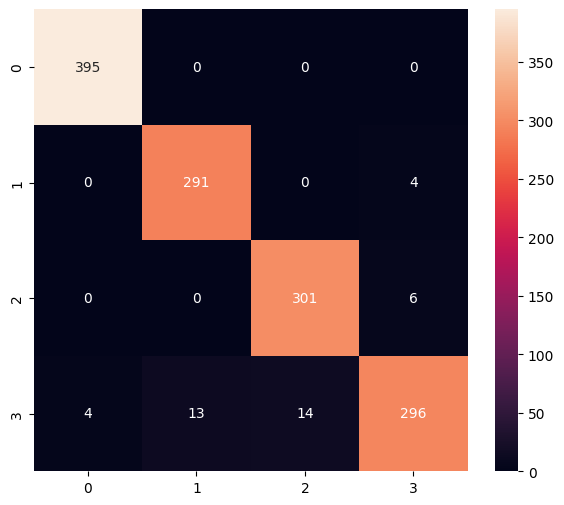

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.96      0.99      0.97       295
           2       0.96      0.98      0.97       307
           3       0.97      0.91      0.94       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324

INFO:tensorflow:Assets written to: C:\Users\prati\AppData\Local\Temp\tmp0rvcgjfo\assets


INFO:tensorflow:Assets written to: C:\Users\prati\AppData\Local\Temp\tmp0rvcgjfo\assets


Saved artifact at 'C:\Users\prati\AppData\Local\Temp\tmp0rvcgjfo'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1990725314192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1990725319376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1990725317072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1990725320528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1990725314960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1990725319184: TensorSpec(shape=(), dtype=tf.resource, name=None)


6444

In [7]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

dataset = r'C:/Users/prati/Desktop/Hand Gesture Recognition/data/point_history/point_history.csv'
model_save_path = 'model/point_history_classifier/point_classifier.keras'

NUM_CLASSES = 4

TIME_STEPS = 16
DIMENSION = 2

X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

model = tf.keras.models.load_model(model_save_path)

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# Inference Test


In [8]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\prati\Desktop\Hand Gesture Recognition\environment_cnn\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [9]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [10]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [11]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [12]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.93553454 0.0230013  0.01614013 0.02532398]
0
